# Stationary Iterative Methods for Linear Systems

In [2]:
import numpy as np
import scipy.linalg as la

import matplotlib.pyplot as pt

Let's solve $u''=-30x^2$ with $u(0)=1$ and $u(1)=-1$.

In [3]:
n = 50

mesh = np.linspace(0, 1, n)
h = mesh[1] - mesh[0]

Set up the system matrix `A` to carry out centered finite differences

$$
u''(x)\approx \frac{u(x+h) - 2u(x) + u(x-h)}{h^2}.
$$

Use `np.eye(n, k=...)`. What needs to be in the first and last row?

In [5]:
#clear
A = (np.eye(n, k=1) + -2*np.eye(n) + np.eye(n, k=-1))/h**2
A[0] = 0
A[-1] = 0
A[0,0] = 1
A[-1,-1] = 1

Next, fix the right hand side:

In [9]:
b = -30*mesh**2
b[0] = 1
b[-1] = -1

Compute a reference solution `x_true` to the linear system:

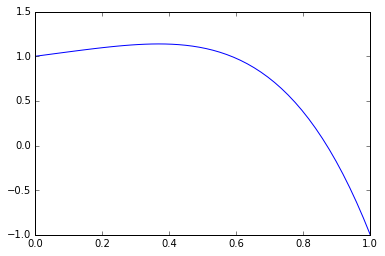

In [10]:
x_true = la.solve(A, b)
pt.plot(mesh, x_true)

Next, we'll try all the stationary iterative methods we have seen.

## Jacobi

In [44]:
x = np.zeros(n)

Next, apply a Jacobi step:

In [42]:
x_new = np.empty(n)

for i in range(n):
    x_new[i] = b[i]
    for j in range(n):
        if i != j:
            x_new[i] -= A[i,j]*x[j]
        
    x_new[i] = x_new[i] / A[i,i]

x = x_new

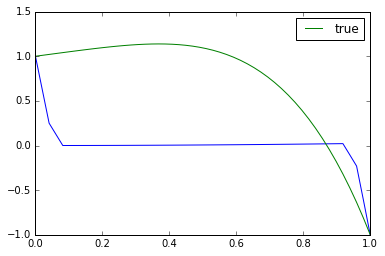

In [43]:
pt.plot(mesh, x)
pt.plot(mesh, x_true, label="true")
pt.legend()

* Ideas to accelerate this?
* Multigrid

## Gauss-Seidel

In [45]:
x = np.zeros(n)

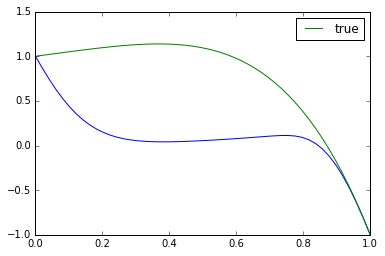

In [64]:
x_new = np.empty(n)

for i in range(n):
    x_new[i] = b[i]
    for j in range(i):
        x_new[i] -= A[i,j]*x_new[j]
    for j in range(i+1, n):
        x_new[i] -= A[i,j]*x[j]
        
    x_new[i] = x_new[i] / A[i,i]

x = x_new
pt.plot(mesh, x)
pt.plot(mesh, x_true, label="true")
pt.legend()

### And now Successive Over-Relaxation ("SOR")

In [92]:
x = np.zeros(n)

(-1.3, 1.3)

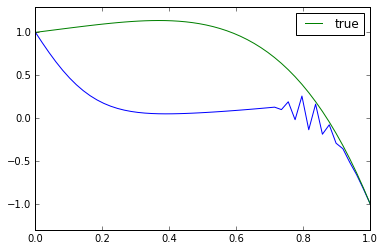

In [106]:
x_new = np.empty(n)

for i in range(n):
    x_new[i] = b[i]
    for j in range(i):
        x_new[i] -= A[i,j]*x_new[j]
    for j in range(i+1, n):
        x_new[i] -= A[i,j]*x[j]
        
    x_new[i] = x_new[i] / A[i,i]

direction = x_new - x
omega = 1.5
x = x + omega*direction

pt.plot(mesh, x)
pt.plot(mesh, x_true, label="true")
pt.legend()
pt.ylim([-1.3, 1.3])